In [2]:
import numpy as np
import pandas as pd

In [3]:
v = np.array([23,11,46,42,33,56,7,88,54])

In [4]:
s = pd.Series([23,11,46,42,33,56,7,88,54])

In [5]:
v

array([23, 11, 46, 42, 33, 56,  7, 88, 54])

In [6]:
s

0    23
1    11
2    46
3    42
4    33
5    56
6     7
7    88
8    54
dtype: int64

#### mean

In [8]:
sum(v) / v.size

40.0

In [9]:
s.sum() / s.size

40.0

In [10]:
v.mean()

40.0

In [11]:
s.mean()

40.0

#### median

In [13]:
s.median()

42.0

In [14]:
np.median(v)

42.0

In [33]:
x = np.array([12,13,14,15])

In [40]:
def median(n):
    if n.size % 2 == 1:
        return n[n.size//2 - 1]
    else:
        return (n[n.size//2] + n[n.size//2 - 1]) / 2

In [43]:
median(x)

13.5

#### mode

In [45]:
x = np.array([54,33,23,6,66,54,34,78,54,12])

In [47]:
s = pd.Series([54,33,23,6,66,54,34,78,54,12])

In [48]:
s.mode()

0    54
dtype: int64

In [49]:
s.value_counts()

54    3
33    1
23    1
6     1
66    1
34    1
78    1
12    1
dtype: int64

In [50]:
from collections import Counter
Counter(s)

Counter({54: 3, 33: 1, 23: 1, 6: 1, 66: 1, 34: 1, 78: 1, 12: 1})

In [51]:
s = pd.Series([54,34,23,34,66,54,34,78,54,12])

In [52]:
s.mode()

0    34
1    54
dtype: int64

In [53]:
import seaborn as sns

<AxesSubplot:ylabel='count'>

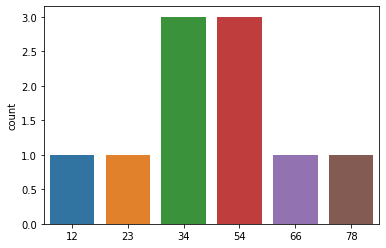

In [54]:
sns.countplot(x=s)

#### mean absolute deviation

In [58]:
np.mean(abs(v - v.mean()))

19.11111111111111

In [59]:
np.mean(abs(s - s.mean()))

16.9

#### variance

In [63]:
np.mean((v - v.mean()) ** 2)

562.6666666666666

In [64]:
from statistics import pvariance
pvariance(v)

562

In [65]:
np.mean((s - s.mean()) ** 2)

370.41

In [66]:
pvariance(s)

370.41

In [79]:
z = np.array([5,7,3.0,9,4,2])

In [80]:
pvariance(z)

5.666666666666667

#### Standard deviation

In [82]:
np.sqrt(np.mean((v - v.mean()) ** 2))

23.72059583287626

In [83]:
v.std()

23.72059583287626

In [84]:
np.sqrt(np.mean((s - s.mean()) ** 2))

19.24603855342704

In [85]:
s.std()

20.287105921413897

In [86]:
np.std(s)

19.24603855342704

#### Range

In [91]:
s.max() - s.min()

66

In [92]:
v.max() - v.min()

81

#### Density Distribution

In [100]:
x = pd.Series([1,2,3,4,4,5,5,6,6,7,7,7,8,8,9,9,10,10,11,12,13])

In [106]:
x;

<AxesSubplot:ylabel='Density'>

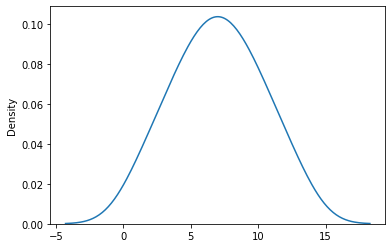

In [102]:
sns.kdeplot(x)

In [103]:
x.mean()

7.0

In [104]:
x.median()

7.0

In [105]:
x.mode()

0    7
dtype: int64

In [107]:
df = pd.read_csv('student.csv')

<AxesSubplot:xlabel='marks', ylabel='Density'>

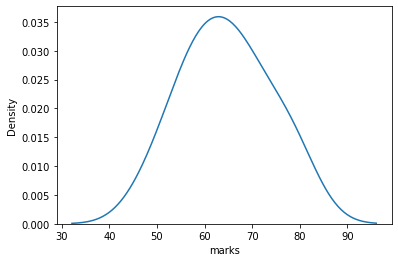

In [109]:
sns.kdeplot(df['marks'])

<AxesSubplot:xlabel='age', ylabel='Density'>

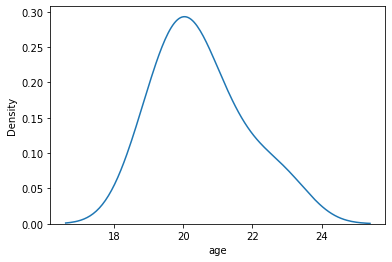

In [110]:
sns.kdeplot(df['age'])

#### Skewness

In [117]:
from scipy.stats import skew

In [120]:
x;

In [118]:
# 0 -> ideal bell curve
skew(x)

0.0

In [133]:
x1 = pd.Series([1,1,1,1,2,2,2,2,3,3,4,5,6,7,8,9,10])

<AxesSubplot:ylabel='Density'>

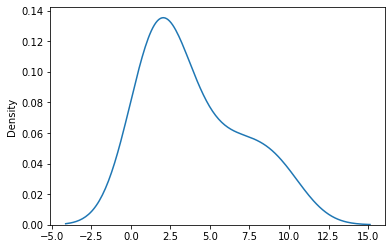

In [134]:
sns.kdeplot(x1)

In [135]:
skew(x1)

0.766938081548668

In [140]:
x1.mode()[0], x1.median(), x1.mean()

(1, 3.0, 3.9411764705882355)

In [141]:
x2 = pd.Series([1,2,3,4,5,6,7,7,8,8,9,9,9,10,10,10,10,10])

<AxesSubplot:ylabel='Density'>

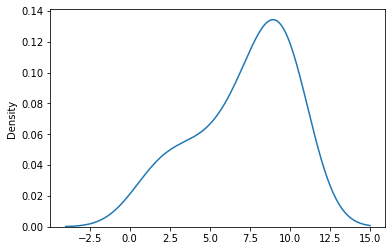

In [142]:
sns.kdeplot(x2)

In [143]:
x2.mode()[0], x2.median(), x2.mean()

(10, 8.0, 7.111111111111111)

In [144]:
skew(x2)

-0.7636847593733299

In [152]:
m = pd.Series([61]*5+[64]*18+[67]*42+[70]*27+[73]*8)

In [153]:
skew(m)

-0.10815437112299389

<AxesSubplot:ylabel='Density'>

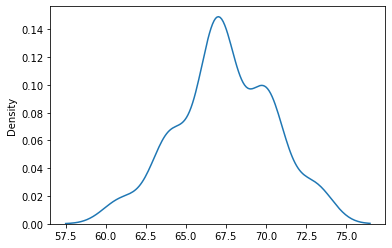

In [154]:
sns.kdeplot(m)

In [155]:
skew(df['marks'])

0.08352893890364131

#### Kurtosis

In [157]:
from scipy.stats import kurtosis

In [159]:
kurtosis(s)

-0.9110296498185608

In [161]:
kurtosis([0,10,10,20])

-1.0

<AxesSubplot:ylabel='Density'>

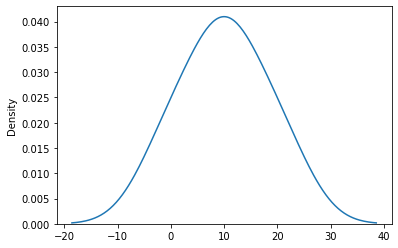

In [162]:
sns.kdeplot([0,10,10,20])

## Outlier Detection

#### box plot

In [165]:
sal = []
for n in range(100):
    sal.append(np.random.randint(25000, 40000))

In [167]:
df = pd.DataFrame({
    'salary': sal
})

In [168]:
df

,salary
0,37419
1,28879
2,26460
3,37216
4,38766
...,...
95,33313
96,38422
97,31771
98,25225


In [179]:
df.iloc[34,:] = 52000
df.iloc[81,:] = 56500
df.iloc[57,:] = 15000

In [180]:
df

,salary
0,37419
1,28879
2,26460
3,37216
4,38766
...,...
95,33313
96,38422
97,31771
98,25225


<AxesSubplot:>

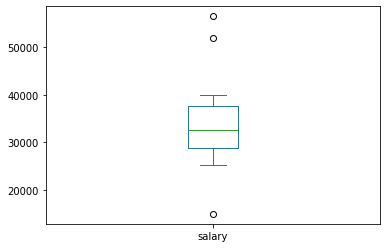

In [181]:
df.plot.box()

/home/mitu/.local/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

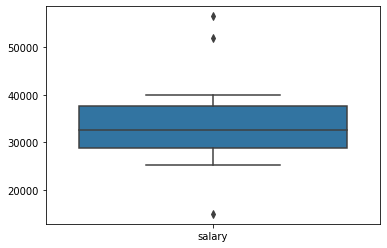

In [183]:
sns.boxplot(data=df)

#### Histogram

<AxesSubplot:ylabel='Frequency'>

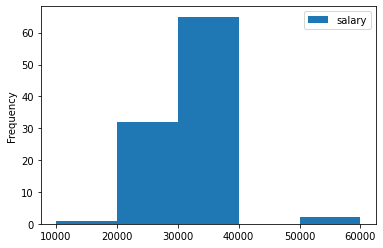

In [188]:
df.plot.hist(bins=range(10000,60001,10000))

In [190]:
ndf = df[(df['salary'] >= 20000) & (df['salary'] <= 40000)]

In [191]:
ndf.shape

(97, 1)

<AxesSubplot:>

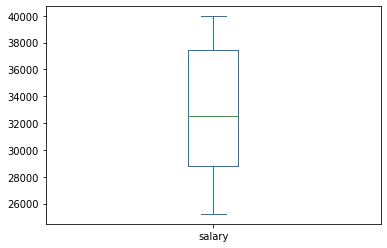

In [192]:
ndf.plot.box()

<AxesSubplot:ylabel='Frequency'>

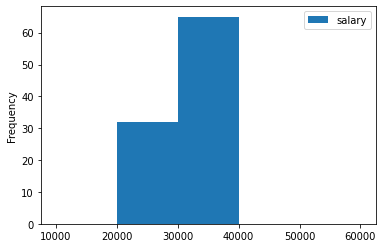

In [193]:
ndf.plot.hist(bins=range(10000,60001,10000))

#### Z-scores

In [199]:
def zscore(n):
    score = (n - np.mean(n)) / n.std()
    return score

In [202]:
zscore(df['salary'])

0     0.776855
1    -0.727801
2    -1.154003
3     0.741089
4     1.014182
        ...   
95    0.053422
96    0.953573
97   -0.218261
98   -1.371596
99   -1.158936
Name: salary, Length: 100, dtype: float64

<AxesSubplot:>

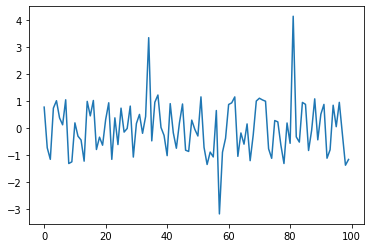

In [203]:
zscore(df['salary']).plot()

In [204]:
import matplotlib.pyplot as plt

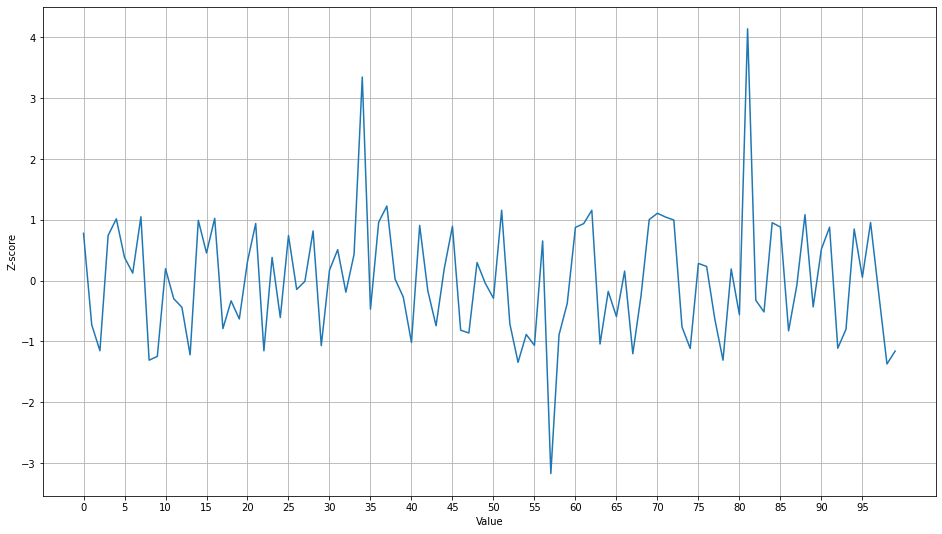

In [207]:
plt.figure(figsize=(16,9))
plt.xlabel('Value')
plt.ylabel('Z-score')
plt.grid()
plt.xticks(range(0,100,5))
plt.plot(range(0,100), zscore(df['salary']))

In [214]:
zscore(df['salary']) > 3.0

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: salary, Length: 100, dtype: bool

In [218]:
ndf = df[(zscore(df['salary']) < 3.0) & 
         (zscore(df['salary']) > -3.0)]

In [219]:
ndf.shape

(97, 1)

#### Turkey's fences

In [225]:
df.describe()

,salary
count,100.000000
mean,33009.790000
std,5675.715453
min,15000.000000
25%,28759.750000
50%,32655.000000
75%,37682.500000
max,56500.000000


In [221]:
# Calculate the third and first quartiles of the data
Q3 = np.percentile(df, 75)
Q1 = np.percentile(df, 25)

In [227]:
Q1, Q3

(28759.75, 37682.5)

In [222]:
# Calculate the interquartile range
IQR = Q3 - Q1

In [223]:
# Calculate the upper and lower fences
upper_fence = Q3 + 1.5 * IQR
lower_fence = Q1 - 1.5 * IQR

In [228]:
upper_fence, lower_fence

(51066.625, 15375.625)

In [229]:
ndf = df[(df['salary'] > lower_fence) & 
         (df['salary'] < upper_fence)]

In [230]:
ndf.shape

(97, 1)

<BarContainer object of 100 artists>

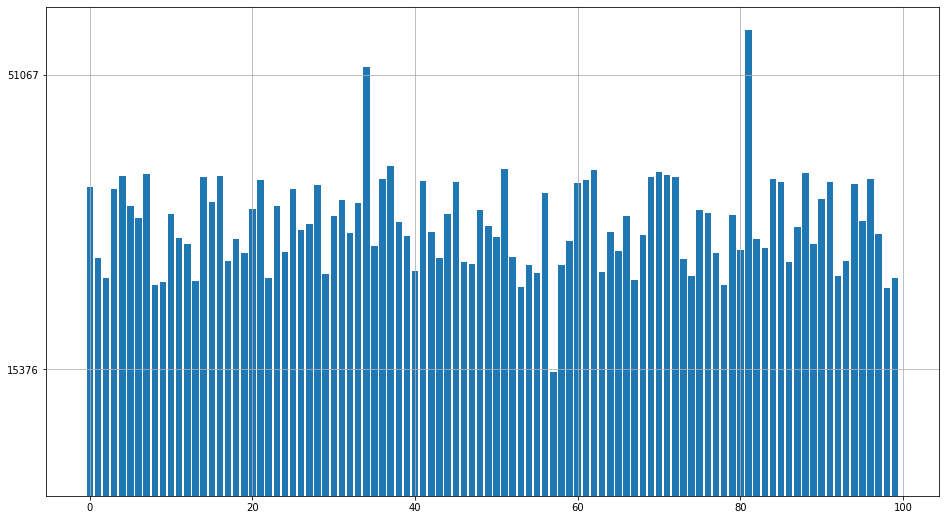

In [238]:
plt.figure(figsize=(16,9))
plt.grid()
plt.yticks([upper_fence,lower_fence])
plt.bar(range(100), df['salary'])